**Kaggle Competition**

<a>https://www.kaggle.com/competitions/regression-with-an-insurance-dataset/overview</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the data
insurance = pd.read_csv("./dataset/train.csv")

### Data Exploration

In [3]:
# Explore data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [4]:
# look at some records
insurance.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


**Observation**: id can be marked as index here

In [5]:
# make id as the index key
insurance.set_index("id", inplace=True)
insurance.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
id,,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [6]:
#lets explore some stats
insurance.describe()

,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount
count,1.181295e+06,1.155051e+06,1.090328e+06,1.125924e+06,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1.200000e+06
mean,4.114556e+01,3.274522e+04,2.009934e+00,2.561391e+01,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,1.102545e+03
std,1.353995e+01,3.217951e+04,1.417338e+00,1.220346e+01,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,8.649989e+02
min,1.800000e+01,1.000000e+00,0.000000e+00,2.012237e+00,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,2.000000e+01
25%,3.000000e+01,8.001000e+03,1.000000e+00,1.591896e+01,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,5.140000e+02
50%,4.100000e+01,2.391100e+04,2.000000e+00,2.457865e+01,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,8.720000e+02
75%,5.300000e+01,4.463400e+04,3.000000e+00,3.452721e+01,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,1.509000e+03
max,6.400000e+01,1.499970e+05,4.000000e+00,5.897591e+01,9.000000,1.900000e+01,8.490000e+02,9.000000e+00,4.999000e+03


<Axes: xlabel='Gender'>

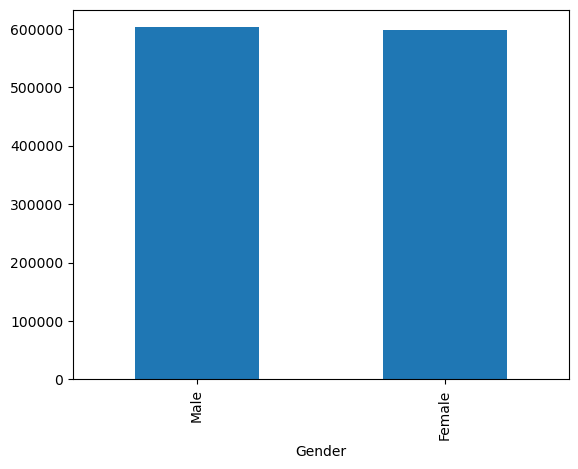

In [7]:
# Lets find out about categorical values
insurance["Gender"].value_counts().plot(kind="bar")

**Observation**: Gender data is balanced

<Axes: xlabel='Marital Status'>

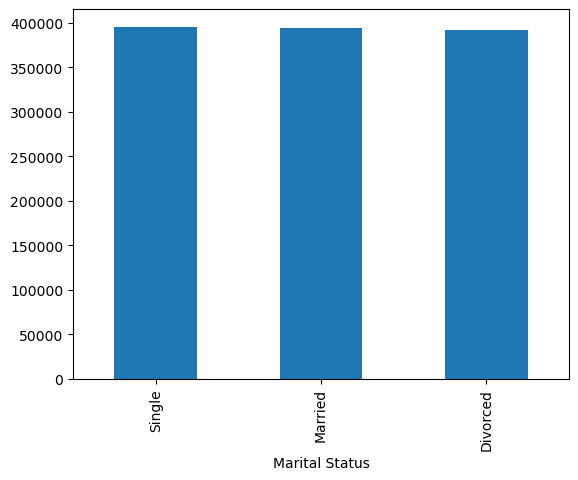

In [8]:
insurance["Marital Status"].value_counts().plot(kind="bar")

**Observation**: Marital Status data is balanced

<Axes: xlabel='Number of Dependents'>

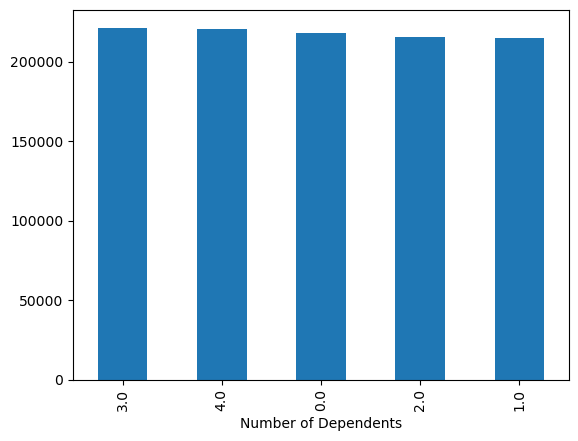

In [9]:
insurance["Number of Dependents"].value_counts().plot(kind="bar")

**Observation**: Number of Dependents data is balanced

<Axes: xlabel='Education Level'>

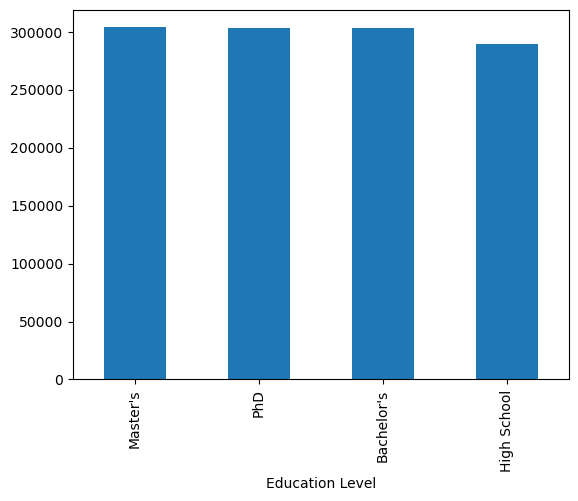

In [10]:
insurance["Education Level"].value_counts().plot(kind="bar")

**Observation**: Education Level data is balanced

<Axes: xlabel='Occupation'>

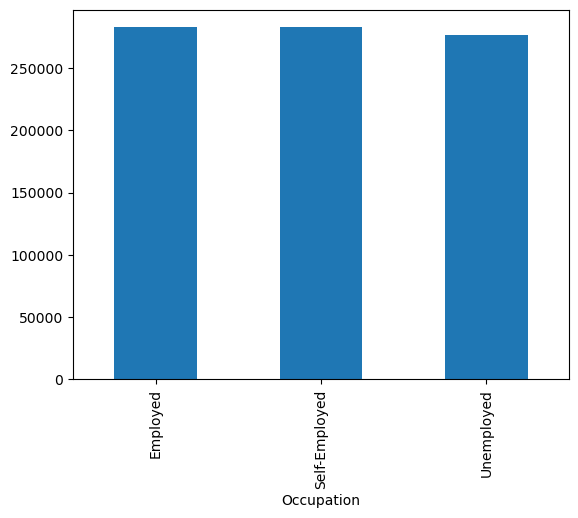

In [11]:
insurance["Occupation"].value_counts().plot(kind="bar")

**Observation**: Occupation data is balanced. But there are lots of missing data as well

<Axes: xlabel='Location'>

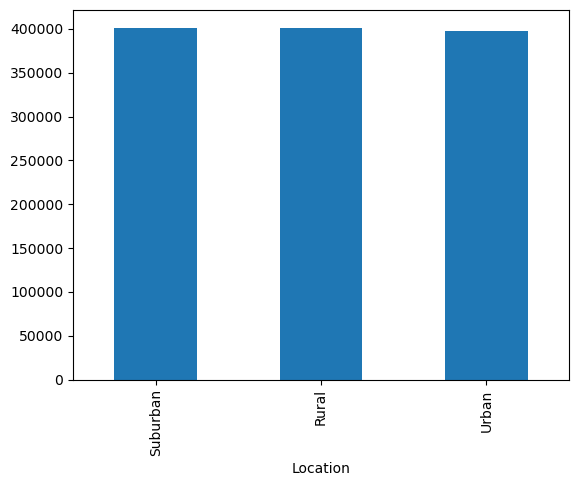

In [12]:
insurance["Location"].value_counts().plot(kind="bar")

**Observation**: Location data is balanced

<Axes: xlabel='Policy Type'>

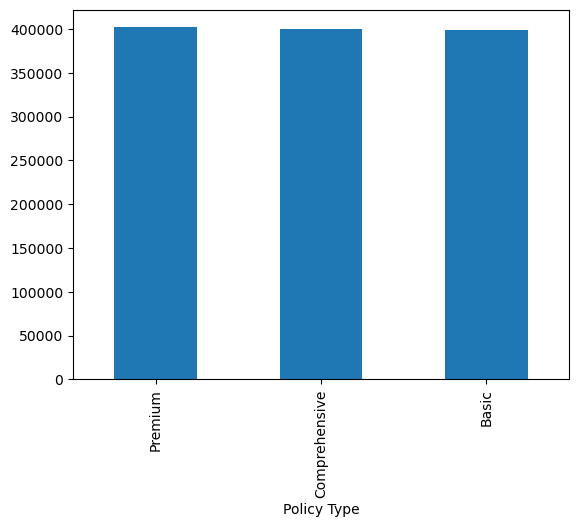

In [13]:
insurance["Policy Type"].value_counts().plot(kind="bar")

**Observation**: Policy Type data is balanced

<Axes: xlabel='Customer Feedback'>

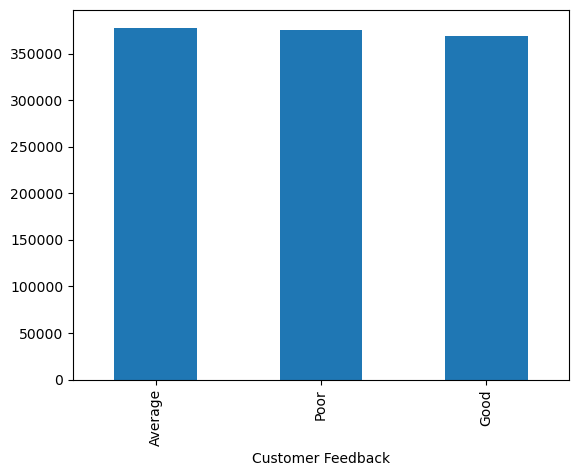

In [14]:
insurance["Customer Feedback"].value_counts().plot(kind="bar")

**Observation**: Customer Feedback data is balanced

<Axes: xlabel='Smoking Status'>

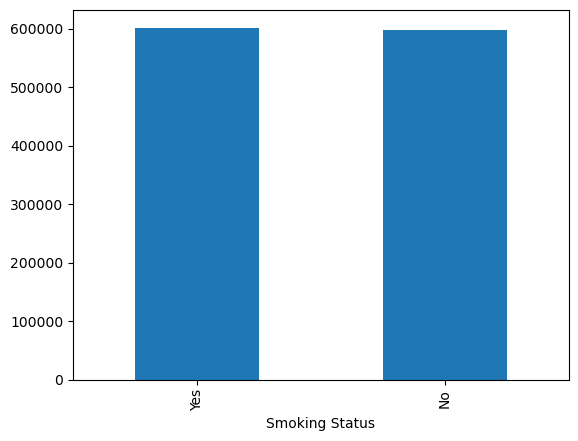

In [15]:
insurance["Smoking Status"].value_counts().plot(kind="bar")

**Observation**: Smoking Status data is balanced

<Axes: xlabel='Exercise Frequency'>

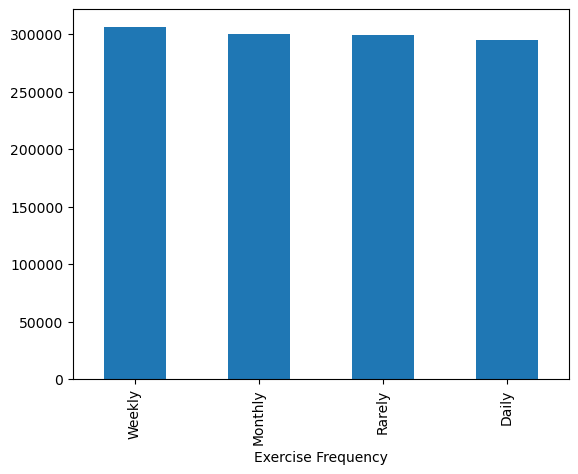

In [16]:
insurance["Exercise Frequency"].value_counts().plot(kind="bar")

**Observation**: Exercise Frequency data is balanced

<Axes: xlabel='Property Type'>

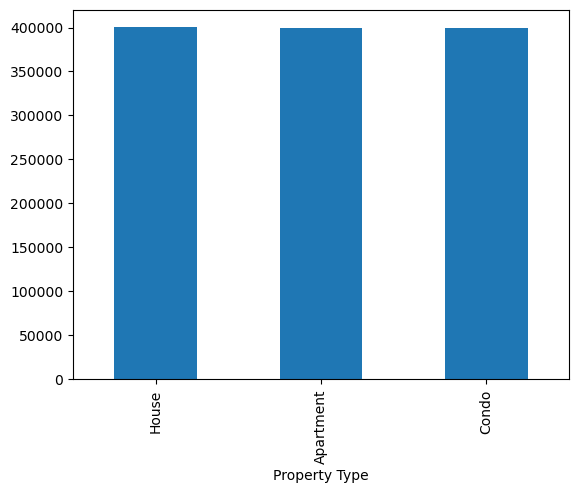

In [17]:
insurance["Property Type"].value_counts().plot(kind="bar")

**Observation**: Property Type data is balanced

**The dataset is well balanced, with a few missing values. Occupation seems the be the one with the most missing values.**

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Annual Income'}>,
        <Axes: title={'center': 'Number of Dependents'}>],
       [<Axes: title={'center': 'Health Score'}>,
        <Axes: title={'center': 'Previous Claims'}>,
        <Axes: title={'center': 'Vehicle Age'}>],
       [<Axes: title={'center': 'Credit Score'}>,
        <Axes: title={'center': 'Insurance Duration'}>,
        <Axes: title={'center': 'Premium Amount'}>]], dtype=object)

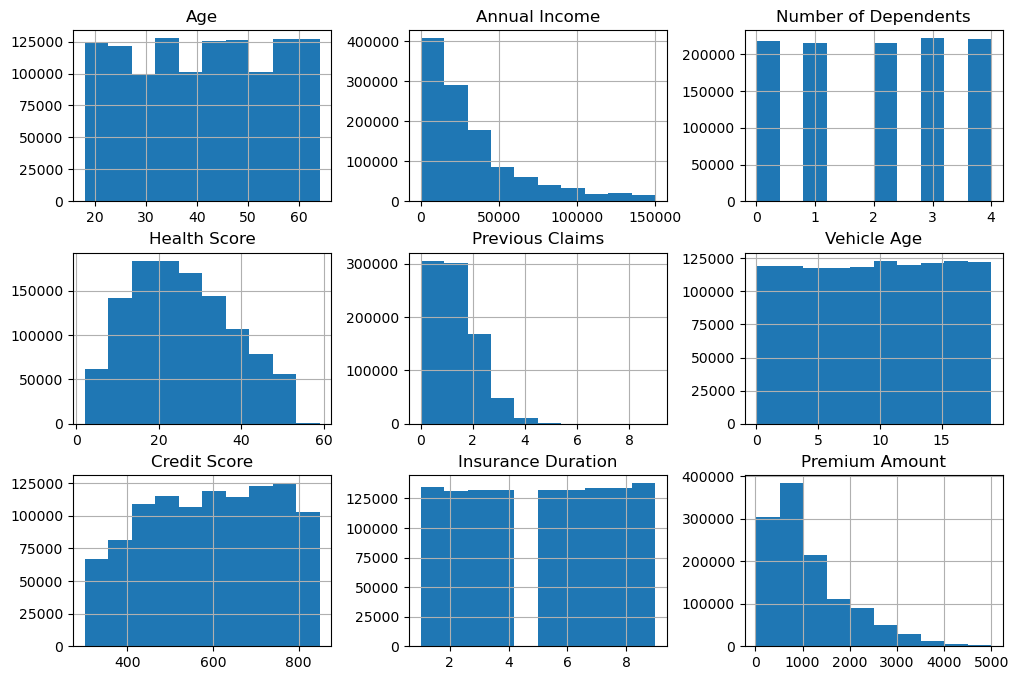

In [18]:
# lets look at the distribution of the data
insurance.hist(figsize=(12,8))

In [19]:
# Lets look at the correlation data
insurance.corr(numeric_only=True)["Premium Amount"]

Age                    -0.002430
Annual Income          -0.012390
Number of Dependents   -0.000976
Health Score            0.014704
Previous Claims         0.046874
Vehicle Age             0.000391
Credit Score           -0.026014
Insurance Duration     -0.000028
Premium Amount          1.000000
Name: Premium Amount, dtype: float64

<Axes: >

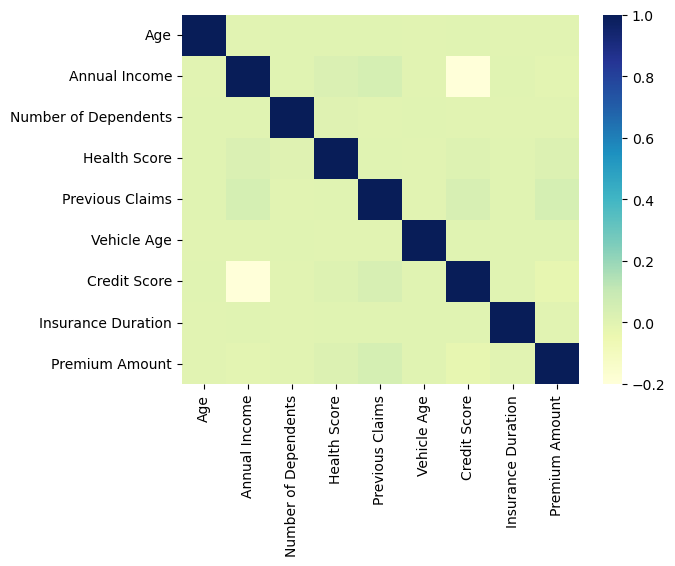

In [20]:
sns.heatmap(insurance.corr(numeric_only=True), cmap="YlGnBu")

**Observation**

- The data is balanced across all the categorical features.
- There are a few missing values, except for 'Occupation'.
- There seems to be no real correlation between premium and other fields.

### Pre processing

In [21]:
# separate the features and target value

In [22]:
X = insurance.drop(columns="Premium Amount", axis=1)
y = np.ravel(insurance[["Premium Amount"]])

In [23]:
X.head()

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House
1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House
2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House
3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment
4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House


In [24]:
y.shape

(1200000,)

In [25]:
# split the dataset to train and test data

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [28]:
# Lets look at missing ages

In [29]:
round(len(X_train[X_train["Age"].isnull()])/len(X_train),2)

0.02

In [30]:
X_train[X_train["Age"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
533209,NaN,Male,37149.0,Single,3.0,Bachelor's,Unemployed,22.013864,Rural,Basic,NaN,6.0,495.0,8.0,2022-09-07 15:21:39.171102,Poor,Yes,Daily,Apartment
1172623,NaN,Male,5961.0,Divorced,1.0,PhD,Unemployed,20.513737,Suburban,Premium,1.0,19.0,697.0,1.0,2022-12-02 15:21:39.123711,Poor,Yes,Monthly,Condo
293102,NaN,Female,10045.0,Married,2.0,High School,NaN,30.171737,Urban,Comprehensive,0.0,14.0,NaN,8.0,2019-12-29 15:21:39.145732,Poor,Yes,Daily,Apartment
99098,NaN,Male,72207.0,Married,3.0,Master's,Unemployed,27.527358,Rural,Comprehensive,0.0,5.0,712.0,7.0,2020-10-16 15:21:39.237118,Poor,Yes,Weekly,Condo
1081690,NaN,Male,26881.0,Single,2.0,High School,Unemployed,31.058935,Suburban,Basic,NaN,3.0,758.0,2.0,2022-08-12 15:21:39.256696,Good,No,Rarely,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219963,NaN,Male,5589.0,Divorced,4.0,High School,Self-Employed,13.271603,Rural,Basic,NaN,9.0,501.0,5.0,2024-03-03 15:21:39.098696,Good,No,Rarely,House
134508,NaN,Female,18171.0,Single,3.0,High School,Employed,16.944223,Urban,Premium,1.0,1.0,831.0,8.0,2023-01-28 15:21:39.246098,Good,Yes,Rarely,Condo
740976,NaN,Female,27736.0,Married,3.0,Bachelor's,Self-Employed,39.609036,Suburban,Premium,NaN,18.0,NaN,4.0,2020-10-28 15:21:39.155231,Average,Yes,Rarely,House


In [31]:
X_train[X_train["Age"].isnull()]["Gender"].value_counts()

Gender
Male      6315
Female    6238
Name: count, dtype: int64

In [32]:
# Lets look at Annual Income

In [33]:
round(len(X_train[X_train["Annual Income"].isnull()])/len(X_train),2)

0.04

In [34]:
X_train[X_train["Annual Income"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
310642,22.0,Female,NaN,Married,2.0,PhD,Employed,30.879178,Rural,Basic,1.0,4.0,459.0,9.0,2022-05-02 15:21:39.276901,Average,No,Monthly,House
916144,45.0,Male,NaN,Married,4.0,Master's,Self-Employed,12.285524,Rural,Premium,3.0,17.0,790.0,8.0,2022-04-11 15:21:39.249100,Poor,No,Weekly,Apartment
481151,38.0,Female,NaN,Single,4.0,PhD,Employed,31.955674,Urban,Basic,0.0,6.0,NaN,1.0,2020-09-07 15:21:39.134960,Average,No,Daily,Apartment
59918,56.0,Female,NaN,Divorced,2.0,High School,Self-Employed,20.602692,Urban,Comprehensive,0.0,3.0,409.0,2.0,2020-03-18 15:21:39.272456,Poor,No,Daily,Apartment
252872,61.0,Female,NaN,Single,3.0,Bachelor's,NaN,15.138817,Urban,Basic,NaN,2.0,389.0,2.0,2021-04-29 15:21:39.110557,Poor,No,Daily,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487879,35.0,Male,NaN,Divorced,0.0,Bachelor's,Self-Employed,39.249460,Rural,Basic,NaN,10.0,315.0,2.0,2021-06-25 15:21:39.223901,Average,No,Rarely,Condo
1046797,28.0,Male,NaN,Married,NaN,Bachelor's,Unemployed,NaN,Urban,Comprehensive,2.0,8.0,673.0,3.0,2021-10-28 15:21:39.152732,Poor,Yes,Monthly,Apartment
803591,56.0,Female,NaN,Divorced,4.0,Bachelor's,Employed,10.936904,Rural,Basic,1.0,1.0,759.0,1.0,2023-05-23 15:21:39.174719,Average,Yes,Daily,House


In [35]:
# Let's look at marital status
X_train[X_train["Marital Status"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
1014379,37.0,Male,69945.0,NaN,4.0,PhD,Unemployed,48.396674,Urban,Basic,NaN,10.0,514.0,1.0,2022-08-07 15:21:39.172097,Good,Yes,Monthly,House
544527,34.0,Male,17554.0,NaN,3.0,PhD,Unemployed,11.551149,Rural,Premium,NaN,6.0,784.0,4.0,2023-10-14 15:21:39.237118,Poor,No,Weekly,Apartment
87544,36.0,Female,59549.0,NaN,1.0,Bachelor's,NaN,7.446924,Urban,Comprehensive,NaN,12.0,602.0,4.0,2020-10-26 15:21:39.251142,Average,Yes,Daily,Condo
556003,50.0,Female,6530.0,NaN,3.0,Master's,Employed,11.107775,Suburban,Premium,3.0,2.0,847.0,4.0,2019-11-28 15:21:39.122134,Poor,Yes,Rarely,Apartment
142371,22.0,Female,NaN,NaN,NaN,Master's,Self-Employed,4.570080,Urban,Basic,1.0,19.0,387.0,5.0,2023-03-19 15:21:39.281787,Average,Yes,Daily,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480047,57.0,Male,78839.0,NaN,NaN,Bachelor's,Unemployed,27.912456,Urban,Comprehensive,0.0,13.0,NaN,1.0,2024-02-01 15:21:39.117183,Average,Yes,Weekly,Condo
825816,42.0,Male,828.0,NaN,NaN,High School,Unemployed,31.029865,Rural,Comprehensive,2.0,12.0,NaN,3.0,2022-06-13 15:21:39.113566,Poor,Yes,Daily,House
1167752,44.0,Male,16650.0,NaN,1.0,High School,Unemployed,24.593175,Urban,Comprehensive,4.0,14.0,761.0,5.0,2019-08-27 15:21:39.206847,Good,Yes,Weekly,Apartment


In [36]:
round(len(X_train[X_train["Marital Status"].isnull()])/len(X_train),2)

0.02

In [37]:
# TODO: HANDLE NULL MARITAL STATUS
# For now we will drop it. But classification should be a way to fill blank values.

In [38]:
# Let's look at Number of Dependents

In [39]:
X_train[X_train["Number of Dependents"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
629419,51.0,Female,93370.0,Single,NaN,PhD,Self-Employed,51.894721,Urban,Basic,0.0,8.0,543.0,6.0,2022-08-29 15:21:39.097737,NaN,No,Monthly,House
847199,32.0,Male,63861.0,Single,NaN,PhD,Unemployed,33.089118,Suburban,Basic,2.0,6.0,688.0,2.0,2020-10-27 15:21:39.237118,Good,Yes,Daily,House
513752,23.0,Male,14861.0,Single,NaN,Master's,Self-Employed,25.926114,Suburban,Basic,NaN,10.0,742.0,7.0,2020-11-22 15:21:39.085129,Average,Yes,Monthly,Apartment
818415,41.0,Male,44722.0,Married,NaN,Bachelor's,Employed,5.385088,Suburban,Comprehensive,1.0,16.0,495.0,9.0,2021-12-07 15:21:39.177724,Average,No,Weekly,House
273973,55.0,Male,53415.0,Married,NaN,Master's,Unemployed,14.934226,Urban,Comprehensive,NaN,17.0,386.0,4.0,2022-04-26 15:21:39.120168,Average,Yes,Daily,Condo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196769,54.0,Female,9054.0,Divorced,NaN,Bachelor's,Self-Employed,15.006674,Urban,Comprehensive,2.0,18.0,519.0,1.0,2021-04-08 15:21:39.223390,Poor,No,Daily,Condo
989913,61.0,Female,37898.0,Divorced,NaN,Bachelor's,Unemployed,14.730627,Suburban,Basic,2.0,9.0,771.0,7.0,2020-11-11 15:21:39.134960,Average,Yes,Monthly,House
271836,61.0,Male,93690.0,Single,NaN,Bachelor's,Self-Employed,11.620979,Urban,Basic,2.0,0.0,791.0,9.0,2023-06-22 15:21:39.279729,Average,Yes,Monthly,Apartment


In [40]:
round(len(X_train[X_train["Number of Dependents"].isnull()])/len(X_train),2)

0.09

In [41]:
# Let's look at Occupation

In [42]:
X_train[X_train["Occupation"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
1188551,34.0,Male,697.0,Married,0.0,High School,NaN,24.568861,Suburban,Basic,0.0,11.0,477.0,4.0,2022-08-17 15:21:39.079128,Good,No,Weekly,House
1000154,34.0,Female,45754.0,Married,1.0,PhD,NaN,34.723597,Rural,Comprehensive,2.0,18.0,787.0,3.0,2021-09-29 15:21:39.155231,Good,Yes,Monthly,House
242649,49.0,Male,18059.0,Married,4.0,Bachelor's,NaN,10.384329,Suburban,Premium,2.0,2.0,522.0,6.0,2022-05-08 15:21:39.144722,Good,Yes,Daily,Apartment
841173,55.0,Female,3195.0,Married,3.0,PhD,NaN,NaN,Rural,Basic,0.0,18.0,787.0,4.0,2022-01-01 15:21:39.176717,Average,No,Daily,Apartment
485002,28.0,Female,13879.0,Single,3.0,Bachelor's,NaN,7.834304,Urban,Premium,NaN,14.0,587.0,2.0,2022-11-05 15:21:39.155231,Good,Yes,Monthly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103462,31.0,Female,NaN,Married,1.0,PhD,NaN,22.183345,Rural,Basic,NaN,8.0,328.0,5.0,2021-07-21 15:21:39.226954,Good,No,Daily,House
732180,47.0,Male,1616.0,Married,4.0,Bachelor's,NaN,27.181592,Suburban,Basic,NaN,9.0,345.0,9.0,2023-06-25 15:21:39.134960,Good,No,Daily,Apartment
110268,30.0,Female,2789.0,Single,4.0,High School,NaN,15.965779,Suburban,Basic,NaN,18.0,328.0,5.0,2020-10-08 15:21:39.237118,Good,No,Rarely,Apartment


In [43]:
round(len(X_train[X_train["Occupation"].isnull()])/len(X_train),2)

0.3

In [44]:
# There is a considerable percentage of null values for occupation. Lets understand the relationship a bit more. We will drop these for now.

In [45]:
X_train[X_train["Occupation"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
1188551,34.0,Male,697.0,Married,0.0,High School,NaN,24.568861,Suburban,Basic,0.0,11.0,477.0,4.0,2022-08-17 15:21:39.079128,Good,No,Weekly,House
1000154,34.0,Female,45754.0,Married,1.0,PhD,NaN,34.723597,Rural,Comprehensive,2.0,18.0,787.0,3.0,2021-09-29 15:21:39.155231,Good,Yes,Monthly,House
242649,49.0,Male,18059.0,Married,4.0,Bachelor's,NaN,10.384329,Suburban,Premium,2.0,2.0,522.0,6.0,2022-05-08 15:21:39.144722,Good,Yes,Daily,Apartment
841173,55.0,Female,3195.0,Married,3.0,PhD,NaN,NaN,Rural,Basic,0.0,18.0,787.0,4.0,2022-01-01 15:21:39.176717,Average,No,Daily,Apartment
485002,28.0,Female,13879.0,Single,3.0,Bachelor's,NaN,7.834304,Urban,Premium,NaN,14.0,587.0,2.0,2022-11-05 15:21:39.155231,Good,Yes,Monthly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103462,31.0,Female,NaN,Married,1.0,PhD,NaN,22.183345,Rural,Basic,NaN,8.0,328.0,5.0,2021-07-21 15:21:39.226954,Good,No,Daily,House
732180,47.0,Male,1616.0,Married,4.0,Bachelor's,NaN,27.181592,Suburban,Basic,NaN,9.0,345.0,9.0,2023-06-25 15:21:39.134960,Good,No,Daily,Apartment
110268,30.0,Female,2789.0,Single,4.0,High School,NaN,15.965779,Suburban,Basic,NaN,18.0,328.0,5.0,2020-10-08 15:21:39.237118,Good,No,Rarely,Apartment


In [46]:
# Let's look at health score

In [47]:
X_train[X_train["Health Score"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
1005900,60.0,Male,5928.0,Single,2.0,High School,Employed,NaN,Urban,Comprehensive,0.0,0.0,543.0,1.0,2022-10-29 15:21:39.134960,Average,Yes,Monthly,Apartment
841173,55.0,Female,3195.0,Married,3.0,PhD,NaN,NaN,Rural,Basic,0.0,18.0,787.0,4.0,2022-01-01 15:21:39.176717,Average,No,Daily,Apartment
601640,36.0,Female,11894.0,Single,0.0,Bachelor's,Unemployed,NaN,Rural,Basic,2.0,11.0,NaN,5.0,2023-10-18 15:21:39.143708,Average,No,Rarely,Condo
741185,35.0,Female,14094.0,Married,1.0,High School,Unemployed,NaN,Urban,Premium,0.0,14.0,541.0,3.0,2021-05-27 15:21:39.207847,Poor,No,Rarely,House
932324,53.0,Female,2498.0,Divorced,NaN,High School,Employed,NaN,Suburban,Comprehensive,NaN,12.0,678.0,1.0,2020-09-15 15:21:39.176717,Average,Yes,Daily,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432315,55.0,Female,127850.0,Divorced,3.0,Bachelor's,Unemployed,NaN,Rural,Comprehensive,0.0,14.0,319.0,3.0,2021-05-04 15:21:39.209847,Good,No,Monthly,Apartment
1046797,28.0,Male,NaN,Married,NaN,Bachelor's,Unemployed,NaN,Urban,Comprehensive,2.0,8.0,673.0,3.0,2021-10-28 15:21:39.152732,Poor,Yes,Monthly,Apartment
678843,53.0,Male,2415.0,Single,4.0,High School,Self-Employed,NaN,Rural,Premium,0.0,15.0,617.0,9.0,2022-01-10 15:21:39.082499,Good,No,Rarely,Condo


In [48]:
round(len(X_train[X_train["Health Score"].isnull()])/len(X_train),2)

0.06

In [49]:
# Let's look at Previous Claims

In [50]:
X_train[X_train["Previous Claims"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
930533,46.0,Male,25489.0,Married,2.0,High School,Self-Employed,5.903457,Rural,Basic,NaN,4.0,NaN,9.0,2019-10-21 15:21:39.108562,Poor,Yes,Rarely,Apartment
242857,51.0,Female,25809.0,Divorced,0.0,High School,Self-Employed,39.244824,Suburban,Basic,NaN,3.0,727.0,3.0,2022-02-26 15:21:39.223901,NaN,Yes,Weekly,Condo
513752,23.0,Male,14861.0,Single,NaN,Master's,Self-Employed,25.926114,Suburban,Basic,NaN,10.0,742.0,7.0,2020-11-22 15:21:39.085129,Average,Yes,Monthly,Apartment
875019,48.0,Female,28650.0,Married,4.0,High School,Self-Employed,37.160639,Suburban,Comprehensive,NaN,6.0,650.0,1.0,2024-07-08 15:21:39.155231,Poor,No,Monthly,Apartment
566130,34.0,Female,9092.0,Divorced,2.0,High School,Employed,5.355547,Suburban,Premium,NaN,5.0,635.0,1.0,2023-04-13 15:21:39.134960,Poor,Yes,Monthly,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989436,52.0,Female,10020.0,Single,0.0,Bachelor's,Employed,12.898326,Rural,Basic,NaN,17.0,751.0,3.0,2024-01-13 15:21:39.155231,Good,No,Weekly,House
1103462,31.0,Female,NaN,Married,1.0,PhD,NaN,22.183345,Rural,Basic,NaN,8.0,328.0,5.0,2021-07-21 15:21:39.226954,Good,No,Daily,House
732180,47.0,Male,1616.0,Married,4.0,Bachelor's,NaN,27.181592,Suburban,Basic,NaN,9.0,345.0,9.0,2023-06-25 15:21:39.134960,Good,No,Daily,Apartment


In [51]:
round(len(X_train[X_train["Previous Claims"].isnull()])/len(X_train),2)

0.3

In [52]:
X_train[X_train["Credit Score"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
608793,51.0,Female,17175.0,Married,0.0,Master's,Unemployed,6.816229,Suburban,Basic,0.0,6.0,NaN,3.0,2021-05-12 15:21:39.134960,Good,No,Weekly,Apartment
930533,46.0,Male,25489.0,Married,2.0,High School,Self-Employed,5.903457,Rural,Basic,NaN,4.0,NaN,9.0,2019-10-21 15:21:39.108562,Poor,Yes,Rarely,Apartment
613693,41.0,Female,111224.0,Married,0.0,PhD,Unemployed,37.858215,Urban,Premium,0.0,12.0,NaN,8.0,2023-08-27 15:21:39.222387,Poor,No,Weekly,House
601640,36.0,Female,11894.0,Single,0.0,Bachelor's,Unemployed,NaN,Rural,Basic,2.0,11.0,NaN,5.0,2023-10-18 15:21:39.143708,Average,No,Rarely,Condo
515734,59.0,Male,20556.0,Single,3.0,PhD,Employed,37.898500,Suburban,Premium,0.0,19.0,NaN,7.0,2021-01-18 15:21:39.083497,Good,No,Daily,Apartment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007293,35.0,Female,49744.0,Married,2.0,Bachelor's,Unemployed,10.558538,Rural,Basic,2.0,10.0,NaN,5.0,2019-11-05 15:21:39.278402,Average,Yes,Rarely,Apartment
202283,33.0,Male,76980.0,Divorced,0.0,PhD,Self-Employed,52.483573,Suburban,Comprehensive,0.0,4.0,NaN,6.0,2022-12-07 15:21:39.289099,Poor,No,Monthly,Apartment
349457,26.0,Female,39751.0,Single,4.0,PhD,NaN,36.465734,Rural,Comprehensive,1.0,16.0,NaN,6.0,2020-03-29 15:21:39.279729,Average,No,Rarely,Condo


In [53]:
round(len(X_train[X_train["Credit Score"].isnull()])/len(X_train),2)

0.11

In [54]:
X_train[X_train["Insurance Duration"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
711358,64.0,Male,30206.0,Married,3.0,Master's,Employed,49.551038,Suburban,Basic,0.0,18.0,581.0,NaN,2022-04-06 15:21:39.203442,Poor,Yes,Rarely,Apartment


In [55]:
round(len(X_train[X_train["Insurance Duration"].isnull()])/len(X_train),2)

0.0

In [56]:
X_train[X_train["Customer Feedback"].isnull()]

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
id,,,,,,,,,,,,,,,,,,,
629419,51.0,Female,93370.0,Single,NaN,PhD,Self-Employed,51.894721,Urban,Basic,0.0,8.0,543.0,6.0,2022-08-29 15:21:39.097737,NaN,No,Monthly,House
242857,51.0,Female,25809.0,Divorced,0.0,High School,Self-Employed,39.244824,Suburban,Basic,NaN,3.0,727.0,3.0,2022-02-26 15:21:39.223901,NaN,Yes,Weekly,Condo
124270,21.0,Female,622.0,Divorced,3.0,Master's,NaN,16.726375,Rural,Premium,0.0,4.0,661.0,7.0,2023-06-11 15:21:39.134960,NaN,Yes,Rarely,Condo
906711,26.0,Male,11063.0,Married,0.0,Bachelor's,NaN,27.458035,Suburban,Basic,0.0,7.0,730.0,4.0,2021-09-26 15:21:39.104139,NaN,Yes,Daily,House
731512,60.0,Female,5718.0,Single,3.0,High School,Employed,8.091366,Urban,Premium,0.0,0.0,746.0,8.0,2021-03-22 15:21:39.123711,NaN,Yes,Monthly,House
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208261,28.0,Male,93666.0,Divorced,4.0,High School,Unemployed,18.140076,Rural,Basic,0.0,5.0,354.0,3.0,2022-02-21 15:21:39.248098,NaN,Yes,Monthly,House
572843,27.0,Male,10045.0,Single,4.0,Bachelor's,Employed,11.593280,Rural,Comprehensive,0.0,4.0,725.0,6.0,2023-09-30 15:21:39.155231,NaN,Yes,Monthly,Apartment
319030,59.0,Male,20360.0,Married,0.0,High School,Self-Employed,13.291279,Rural,Basic,NaN,5.0,711.0,1.0,2020-08-28 15:21:39.237118,NaN,Yes,Monthly,House


In [57]:
round(len(X_train[X_train["Customer Feedback"].isnull()])/len(X_train),2)

0.06

In [58]:
# This is a considerable amount. Assuming the mean as Avergae, we will set the missing values with Average

In [59]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

In [60]:
# Lets create a mean imputer for age, annual income, Number of Dependents, Previous Claims, Credit Score

In [61]:
class MeanImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X["Age"] = imputer.fit_transform(X[["Age"]])
        X["Annual Income"] = imputer.fit_transform(X[["Annual Income"]])
        X["Number of Dependents"] = imputer.fit_transform(X[["Number of Dependents"]])
        X["Health Score"] = imputer.fit_transform(X[["Health Score"]])
        X["Previous Claims"] = imputer.fit_transform(X[["Previous Claims"]])
        X["Credit Score"] = imputer.fit_transform(X[["Credit Score"]])
        return X

In [62]:
# column dropper. Used for Occupation, Vehicle Age

In [63]:
class ColumnDropperImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X.drop(columns=["Occupation", "Vehicle Age", "Marital Status"], axis=1, inplace=True)
        return X

In [64]:
class CategoryImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["Customer Feedback"].fillna("Average", inplace=True)
        return X

In [65]:
# encoding the categorical features

In [66]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        oh_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
        features_names = ["Gender", "Customer Feedback", "Smoking Status", "Property Type", "Education Level", "Location", "Policy Type", "Exercise Frequency"]
        transformed_array = oh_encoder.fit_transform(X[features_names])
        #df = pd.DataFrame(transformed_array.toarray(), columns=oh_encoder.get_feature_names_out())
        encoded_X = pd.concat([X, transformed_array], axis=1)
        # drop the categorical features
        encoded_X.drop(columns=features_names, axis=1, inplace=True)
        return encoded_X

In [67]:
# Lets create preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804000 entries, 221751 to 121958
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   791447 non-null  float64
 1   Gender                804000 non-null  object 
 2   Annual Income         773894 non-null  float64
 3   Marital Status        791529 non-null  object 
 4   Number of Dependents  730406 non-null  float64
 5   Education Level       804000 non-null  object 
 6   Occupation            564163 non-null  object 
 7   Health Score          754267 non-null  float64
 8   Location              804000 non-null  object 
 9   Policy Type           804000 non-null  object 
 10  Previous Claims       560072 non-null  float64
 11  Vehicle Age           803996 non-null  float64
 12  Credit Score          711765 non-null  float64
 13  Insurance Duration    803999 non-null  float64
 14  Policy Start Date     804000 non-null  object 
 15  

In [69]:
# let's drop the one blank insurance duration
X_train.dropna(subset=["Insurance Duration"], inplace=True)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803999 entries, 221751 to 121958
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   791446 non-null  float64
 1   Gender                803999 non-null  object 
 2   Annual Income         773893 non-null  float64
 3   Marital Status        791528 non-null  object 
 4   Number of Dependents  730405 non-null  float64
 5   Education Level       803999 non-null  object 
 6   Occupation            564162 non-null  object 
 7   Health Score          754266 non-null  float64
 8   Location              803999 non-null  object 
 9   Policy Type           803999 non-null  object 
 10  Previous Claims       560071 non-null  float64
 11  Vehicle Age           803995 non-null  float64
 12  Credit Score          711764 non-null  float64
 13  Insurance Duration    803999 non-null  float64
 14  Policy Start Date     803999 non-null  object 
 15  

In [70]:
pipeline = Pipeline([
    ("meanimputer", MeanImputer()),
    ("columndropper", ColumnDropperImputer()),
    ("categoryimputer", CategoryImputer()),
    ("featureencoder", FeatureEncoder())
], verbose=True)

In [71]:
X_train_transformed = pipeline.fit_transform(X_train, y_train)

[Pipeline] ....... (step 1 of 4) Processing meanimputer, total=   0.0s
[Pipeline] ..... (step 2 of 4) Processing columndropper, total=   0.0s
[Pipeline] ... (step 3 of 4) Processing categoryimputer, total=   0.0s


/var/folders/by/yqw304pn6418k_170lf7ttvm0000gn/T/ipykernel_30353/188454518.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["Customer Feedback"].fillna("Average", inplace=True)


AttributeError: 'DataFrame' object has no attribute 'toarray'

In [ ]:
X_train_transformed.info()

In [ ]:
X_train_transformed.head(10)

In [ ]:
X_train.loc[[1000154]]

In [ ]:
X_train_transformed.isna().sum()